In [ ]:
按照每个小时的数据进行处理, 节省内存...
胡盛菁说按照每条路分析...

长度长于400的link和短于400的要区分对待
我高估了link之间的相关性啊.

In [1]:
import pandas as pd
import seaborn as sns
% matplotlib inline
import matplotlib.pyplot as plt

## 导入数据

In [2]:
% time sample = pd.read_csv('gy_contest_link_traveltime_training_data.txt',nrows=100,sep=';') # 车流量数据

Wall time: 231 ms


In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
link_ID          100 non-null uint64
date             100 non-null object
time_interval    100 non-null object
travel_time      100 non-null float64
dtypes: float64(1), object(2), uint64(1)
memory usage: 3.2+ KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
tm_itvl=sample['time_interval'].str.replace('[','').str.replace(')','').str.split(',')

In [9]:
sample['t0'] = tm_itvl.apply(lambda x: x[0])

In [10]:
% time sample['t0'] = pd.to_datetime(sample['t0'])

Wall time: 0 ns


Wall time: 344 ms


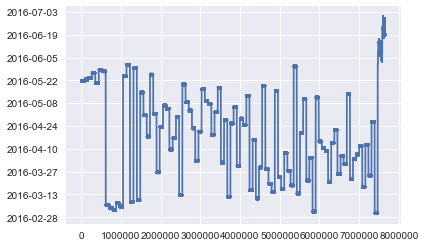

In [26]:
% time plt.plot(sample['t0'])

## 每个的link_ID的t0的情况(有多少条)

In [28]:
link_t0_num=sample[['link_ID','t0']].groupby('link_ID').count()

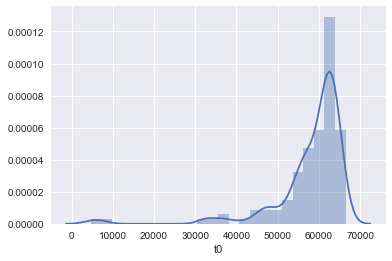

In [29]:
sns.distplot(link_t0_num['t0'])

## 看length和travel_time的hex图(总体看,内存会爆掉)

#### 把link_info的数据与总数据合并

In [47]:
link_info = pd.read_csv('gy_contest_link_info.txt',sep=';') # 路段id,length,width数据

In [48]:
alldata= sample[['link_ID','date','travel_time']]

In [49]:
% time alldata = pd.merge(alldata, link_info[['link_ID','length','width','link_class']], how='left', on='link_ID')

Wall time: 1.05 s


In [50]:
# % time sns.jointplot(alldata['length'],alldata['travel_time'],kind='hex') 直接把电脑内存吃光了!!

In [53]:
alldata.head()

,link_ID,date,travel_time,length,width,link_class
0,9377906285566510514,2016-05-21,17.6,143,9,1
1,3377906288228510514,2016-05-21,3.5,26,12,1
2,3377906284395510514,2016-05-21,10.0,43,12,1
3,4377906284959500514,2016-05-21,3.5,22,9,1
4,9377906282776510514,2016-05-21,1.5,9,9,1


In [61]:
alldata.info()

NameError: name 'alldata' is not defined

ValueError: could not convert string to float: '2016-06-19'

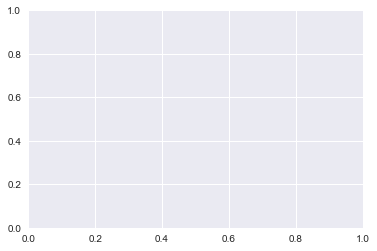

In [59]:
%time sns.kdeplot(x='length',y='travel_time',data=alldata)

## 看一下不同day的分布,不同dayofweek的分布,不同hour的分布,不同minute的分布

### 把时间特征提取出来,并保存数据

In [11]:
# % time tm_itvl=sample['time_interval'].str.replace('[','').str.replace(')','').str.split(',') 同样疯狂吃内存

In [35]:
def to_t0(x):
    x = x.replace('[','').replace(')','').split(',')[0]
    return pd.to_datetime(x)

In [36]:
% time sample['t0']=sample['time_interval'].apply(to_t0) # 70万条数据需要处理6分钟,内存需要2GB

Wall time: 5min 46s


In [37]:
% time sample['year']=sample['t0'].apply(lambda x:x.year) # 70万条数据,每行处理20秒,内存需要2GB
% time sample['month']=sample['t0'].apply(lambda x:x.month)
% time sample['day']=sample['t0'].apply(lambda x:x.day)
% time sample['weekday']=sample['t0'].apply(lambda x:x.weekday())
% time sample['hour']=sample['t0'].apply(lambda x:x.hour)
% time sample['minute']=sample['t0'].apply(lambda x:x.minute)
% time sample['dayofyear']=sample['t0'].apply(lambda x:x.dayofyear)
% time sample['weekofyear']=sample['t0'].apply(lambda x:x.weekofyear)

Wall time: 19.4 s
Wall time: 19.6 s
Wall time: 19.6 s
Wall time: 19.8 s
Wall time: 19.7 s
Wall time: 19.7 s
Wall time: 1min 19s
Wall time: 1min 18s


In [19]:
# 基本用不上的一些特征, 先写在这里
# % time sample['is_month_end']=sample['t0'].apply(lambda x:x.is_month_end)
# % time sample['is_month_start']=sample['t0'].apply(lambda x:x.is_month_start)
# % time sample['is_quarter_end']=sample['t0'].apply(lambda x:x.is_quarter_end)
# % time sample['is_quarter_start']=sample['t0'].apply(lambda x:x.is_quarter_start)
# % time sample['is_year_end']=sample['t0'].apply(lambda x:x.is_year_end)
# % time sample['is_year_start']=sample['t0'].apply(lambda x:x.is_year_start)

Wall time: 11.6 s
Wall time: 11.6 s
Wall time: 11.7 s
Wall time: 11.5 s
Wall time: 12.7 s
Wall time: 11.8 s


In [46]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662384 entries, 0 to 7662383
Data columns (total 13 columns):
link_ID          uint64
date             object
time_interval    object
travel_time      float64
t0               datetime64[ns]
year             int64
month            int64
day              int64
weekday          int64
hour             int64
minute           int64
dayofyear        int64
weekofyear       int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2), uint64(1)
memory usage: 760.0+ MB


In [62]:
sample.head()

,link_ID,date,time_interval,travel_time,t0,year,month,day,weekday,hour,minute,dayofyear,weekofyear
0,9377906285566510514,2016-05-21,"[2016-05-21 23:20:00,2016-05-21 23:22:00)",17.6,2016-05-21 23:20:00,2016,5,21,5,23,20,142,20
1,3377906288228510514,2016-05-21,"[2016-05-21 18:46:00,2016-05-21 18:48:00)",3.5,2016-05-21 18:46:00,2016,5,21,5,18,46,142,20
2,3377906284395510514,2016-05-21,"[2016-05-21 07:06:00,2016-05-21 07:08:00)",10.0,2016-05-21 07:06:00,2016,5,21,5,7,6,142,20
3,4377906284959500514,2016-05-21,"[2016-05-21 14:34:00,2016-05-21 14:36:00)",3.5,2016-05-21 14:34:00,2016,5,21,5,14,34,142,20
4,9377906282776510514,2016-05-21,"[2016-05-21 05:04:00,2016-05-21 05:06:00)",1.5,2016-05-21 05:04:00,2016,5,21,5,5,4,142,20


In [64]:
%time sample.to_csv('data_plus_timedata.csv',encoding='utf-8')

Wall time: 1min 9s


#### 读取保存的数据

In [71]:
% time data = pd.read_csv('data_plus_timedata.csv',index_col =0,nrows=10000000)

C:\Users\guohui\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Wall time: 12.1 s


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662384 entries, 0 to 7662383
Data columns (total 13 columns):
link_ID          uint64
date             object
time_interval    object
travel_time      float64
t0               object
year             int64
month            int64
day              int64
weekday          int64
hour             int64
minute           int64
dayofyear        int64
weekofyear       int64
dtypes: float64(1), int64(8), object(3), uint64(1)
memory usage: 818.4+ MB


In [73]:
data.head()

,link_ID,date,time_interval,travel_time,t0,year,month,day,weekday,hour,minute,dayofyear,weekofyear
0,9377906285566510514,2016-05-21,"[2016-05-21 23:20:00,2016-05-21 23:22:00)",17.6,2016-05-21 23:20:00,2016,5,21,5,23,20,142,20
1,3377906288228510514,2016-05-21,"[2016-05-21 18:46:00,2016-05-21 18:48:00)",3.5,2016-05-21 18:46:00,2016,5,21,5,18,46,142,20
2,3377906284395510514,2016-05-21,"[2016-05-21 07:06:00,2016-05-21 07:08:00)",10.0,2016-05-21 07:06:00,2016,5,21,5,7,6,142,20
3,4377906284959500514,2016-05-21,"[2016-05-21 14:34:00,2016-05-21 14:36:00)",3.5,2016-05-21 14:34:00,2016,5,21,5,14,34,142,20
4,9377906282776510514,2016-05-21,"[2016-05-21 05:04:00,2016-05-21 05:06:00)",1.5,2016-05-21 05:04:00,2016,5,21,5,5,4,142,20


In [74]:
data.tail()

,link_ID,date,time_interval,travel_time,t0,year,month,day,weekday,hour,minute,dayofyear,weekofyear
7662379,4377906289243600514,2016-06-19,"[2016-06-19 06:00:00,2016-06-19 06:02:00)",1.5,2016-06-19 06:00:00,2016,6,19,6,6,0,171,24
7662380,4377906283759500514,2016-06-19,"[2016-06-19 07:48:00,2016-06-19 07:50:00)",5.0,2016-06-19 07:48:00,2016,6,19,6,7,48,171,24
7662381,4377906288663800514,2016-06-19,"[2016-06-19 07:46:00,2016-06-19 07:48:00)",1.6,2016-06-19 07:46:00,2016,6,19,6,7,46,171,24
7662382,4377906280241600514,2016-06-19,"[2016-06-19 07:46:00,2016-06-19 07:48:00)",10.6,2016-06-19 07:46:00,2016,6,19,6,7,46,171,24
7662383,4377906282141600514,2016-06-19,"[2016-06-19 07:46:00,2016-06-19 07:48:00)",5.0,2016-06-19 07:46:00,2016,6,19,6,7,46,171,24


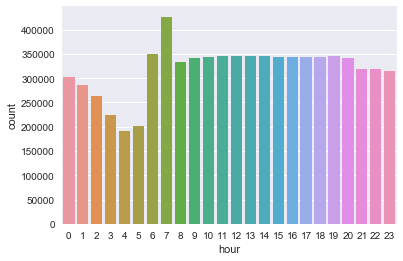

In [39]:
sns.countplot(sample['hour'])

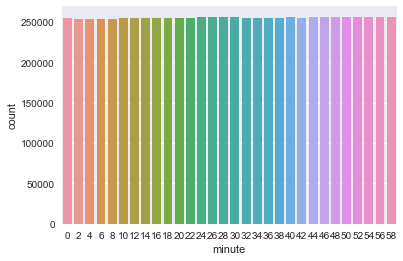

In [40]:
sns.countplot(sample['minute'])

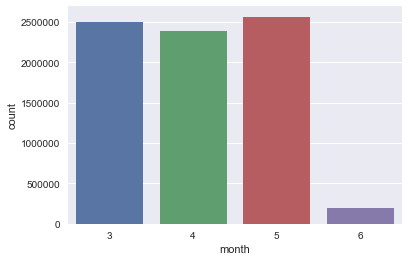

In [41]:
sns.countplot(sample['month'])

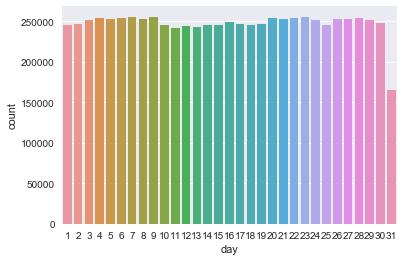

In [42]:
sns.countplot(sample['day'])

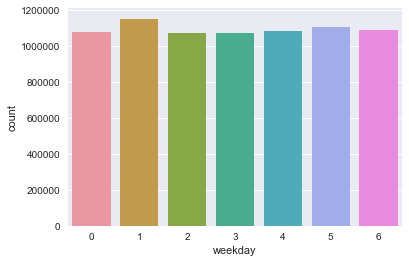

In [43]:
sns.countplot(sample['weekday'])

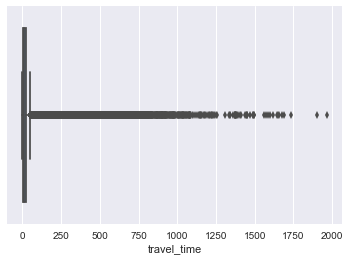

In [44]:
sns.boxplot(sample['travel_time'])

### 把数据拆分成每个月的数据,

In [80]:
% time data_mon3 = sample.query("month==3")
% time data_mon4 = sample.query("month==4")
% time data_mon5 = sample.query("month==5")
% time data_mon6 = sample.query("month==6")

Wall time: 254 ms
Wall time: 230 ms
Wall time: 241 ms
Wall time: 78.1 ms


### 拆分成每个小时的数据

In [86]:
for i in range(24):
    % time exec('data_hour%d = sample.query("hour==%d")' % (i,i))

Wall time: 169 ms
Wall time: 116 ms
Wall time: 115 ms
Wall time: 116 ms
Wall time: 116 ms
Wall time: 100 ms
Wall time: 134 ms
Wall time: 134 ms
Wall time: 130 ms
Wall time: 117 ms
Wall time: 144 ms
Wall time: 125 ms
Wall time: 152 ms
Wall time: 132 ms
Wall time: 144 ms
Wall time: 125 ms
Wall time: 147 ms
Wall time: 132 ms
Wall time: 153 ms
Wall time: 132 ms
Wall time: 133 ms
Wall time: 119 ms
Wall time: 144 ms
Wall time: 135 ms


In [87]:
for i in range(24):
    print(eval('data_hour%d.info()'% i))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 15 to 7462855
Data columns (total 13 columns):
link_ID          302987 non-null uint64
date             302987 non-null object
time_interval    302987 non-null object
travel_time      302987 non-null float64
t0               302987 non-null datetime64[ns]
year             302987 non-null int64
month            302987 non-null int64
day              302987 non-null int64
weekday          302987 non-null int64
hour             302987 non-null int64
minute           302987 non-null int64
dayofyear        302987 non-null int64
weekofyear       302987 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2), uint64(1)
memory usage: 32.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 286479 entries, 10 to 7462815
Data columns (total 13 columns):
link_ID          286479 non-null uint64
date             286479 non-null object
time_interval    286479 non-null object
travel_time      286479 non-null fl

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345530 entries, 33 to 7462849
Data columns (total 13 columns):
link_ID          345530 non-null uint64
date             345530 non-null object
time_interval    345530 non-null object
travel_time      345530 non-null float64
t0               345530 non-null datetime64[ns]
year             345530 non-null int64
month            345530 non-null int64
day              345530 non-null int64
weekday          345530 non-null int64
hour             345530 non-null int64
minute           345530 non-null int64
dayofyear        345530 non-null int64
weekofyear       345530 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2), uint64(1)
memory usage: 36.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345943 entries, 3 to 7462851
Data columns (total 13 columns):
link_ID          345943 non-null uint64
date             345943 non-null object
time_interval    345943 non-null object
travel_time      345943 non-null flo

In [78]:
data_Mar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502906 entries, 617584 to 7462887
Data columns (total 13 columns):
link_ID          uint64
date             object
time_interval    object
travel_time      float64
t0               datetime64[ns]
year             int64
month            int64
day              int64
weekday          int64
hour             int64
minute           int64
dayofyear        int64
weekofyear       int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2), uint64(1)
memory usage: 267.3+ MB


## 查看缺省值,发现并没有

In [91]:
for i in sample.columns:
    exec("print(sample['%s'].isnull().value_counts())" % i)


False    7662384
Name: link_ID, dtype: int64
False    7662384
Name: date, dtype: int64
False    7662384
Name: time_interval, dtype: int64
False    7662384
Name: travel_time, dtype: int64
False    7662384
Name: t0, dtype: int64
False    7662384
Name: year, dtype: int64
False    7662384
Name: month, dtype: int64
False    7662384
Name: day, dtype: int64
False    7662384
Name: weekday, dtype: int64
False    7662384
Name: hour, dtype: int64
False    7662384
Name: minute, dtype: int64
False    7662384
Name: dayofyear, dtype: int64
False    7662384
Name: weekofyear, dtype: int64


In [92]:
d = pd.DataFrame([[4,None,23]])

In [93]:
d.isnull()

,0,1,2
0,False,True,False


## 把8点到9点数据和link_info合并

In [96]:
% time alldata = pd.merge(data_hour8, link_info[['link_ID','length','width','link_class']], how='left', on='link_ID')

Wall time: 100 ms


## 观察8点到9点数据中 length和travel_time的散点图

Wall time: 986 ms


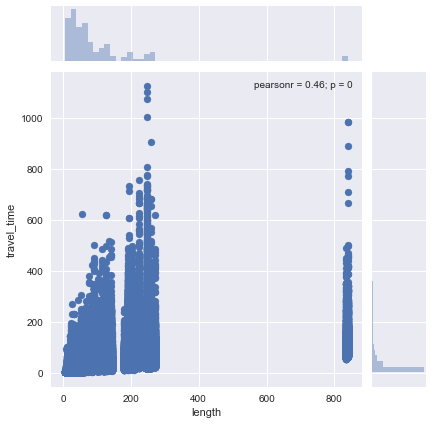

In [170]:
%time sns.jointplot(x='length',y='travel_time',data=alldata)

Wall time: 901 ms


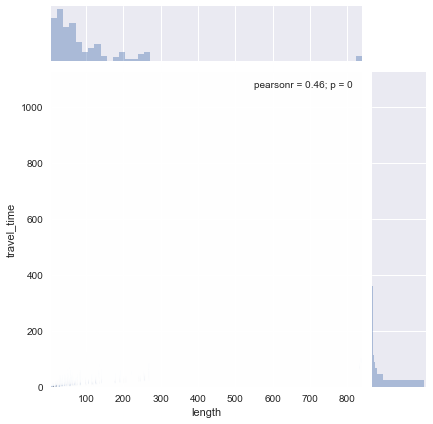

In [171]:
%time sns.jointplot(x='length',y='travel_time',data=alldata,kind='hex')

## length分布

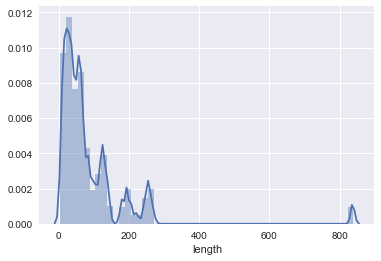

In [172]:
sns.distplot(alldata['length'])

## 建立一个数据列: 每米通过所用时间

In [111]:
alldata['t_div_l']=alldata['travel_time']/alldata['length']

Wall time: 170 ms


[0, 14, 0, 0.5]

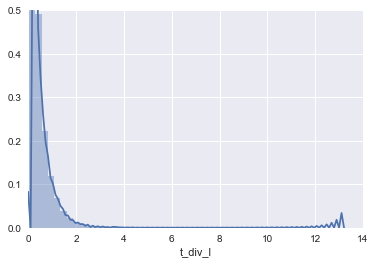

In [123]:

%time sns.distplot(alldata['t_div_l'])
plt.axis([0,14,0,0.5])

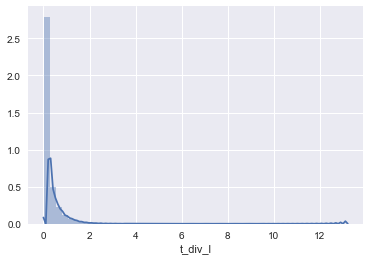

In [149]:
sns.distplot(alldata.query("length<400")['t_div_l'])

In [144]:
alldata.query('t_div_l>5').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 7946 to 322106
Data columns (total 17 columns):
link_ID          50 non-null uint64
date             50 non-null object
time_interval    50 non-null object
travel_time      50 non-null float64
t0               50 non-null datetime64[ns]
year             50 non-null int64
month            50 non-null int64
day              50 non-null int64
weekday          50 non-null int64
hour             50 non-null int64
minute           50 non-null int64
dayofyear        50 non-null int64
weekofyear       50 non-null int64
length           50 non-null int64
width            50 non-null int64
link_class       50 non-null int64
t_div_l          50 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(11), object(2), uint64(1)
memory usage: 7.0+ KB


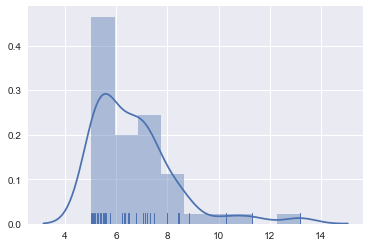

In [143]:
sns.distplot(alldata.query('t_div_l>5')['t_div_l'].values, rug=True)

Wall time: 147 ms


[0, 1200, 0, 0.001]

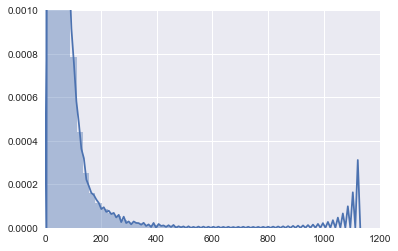

In [131]:
%time sns.distplot(alldata['travel_time'].values)
plt.axis([0,1200,0,0.001])

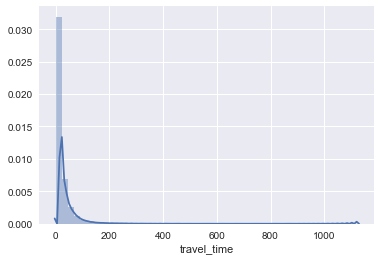

In [151]:
sns.distplot(alldata.query("length<400")['travel_time'])

#### 查一下travel_time 超过1000的有多少行

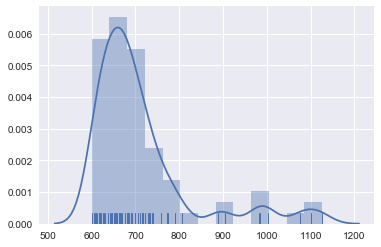

In [136]:
sns.distplot(alldata.query("travel_time>600")['travel_time'].values, rug=True)

In [106]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333947 entries, 0 to 333946
Data columns (total 16 columns):
link_ID          333947 non-null uint64
date             333947 non-null object
time_interval    333947 non-null object
travel_time      333947 non-null float64
t0               333947 non-null datetime64[ns]
year             333947 non-null int64
month            333947 non-null int64
day              333947 non-null int64
weekday          333947 non-null int64
hour             333947 non-null int64
minute           333947 non-null int64
dayofyear        333947 non-null int64
weekofyear       333947 non-null int64
length           333947 non-null int64
width            333947 non-null int64
link_class       333947 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(11), object(2), uint64(1)
memory usage: 53.3+ MB


In [103]:
alldata['travel_time'].dtype

dtype('float64')

In [102]:
alldata['length'].head(10)

0     35
1     14
2     19
3     19
4     31
5     54
6     43
7     50
8     38
9    223
Name: length, dtype: int64

## 按照id区分数据

In [153]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662384 entries, 0 to 7662383
Data columns (total 13 columns):
link_ID          uint64
date             object
time_interval    object
travel_time      float64
t0               datetime64[ns]
year             int64
month            int64
day              int64
weekday          int64
hour             int64
minute           int64
dayofyear        int64
weekofyear       int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2), uint64(1)
memory usage: 760.0+ MB


In [157]:
link_info['link_ID'].dtype

dtype('uint64')

In [166]:
for i in link_info['link_ID']:
      exec("data%d=sample.query(\"link_ID=='%d'\")" % (i,i))
    

In [168]:
exec('print(data%s.head())' % link_info['link_ID'][0])

                 link_ID        date  \
94   4377906289869500514  2016-05-21   
233  4377906289869500514  2016-05-21   
529  4377906289869500514  2016-05-21   
555  4377906289869500514  2016-05-21   
563  4377906289869500514  2016-05-21   

                                 time_interval  travel_time  \
94   [2016-05-21 12:08:00,2016-05-21 12:10:00)          8.7   
233  [2016-05-21 02:56:00,2016-05-21 02:58:00)          5.7   
529  [2016-05-21 08:56:00,2016-05-21 08:58:00)          6.8   
555  [2016-05-21 23:12:00,2016-05-21 23:14:00)          5.4   
563  [2016-05-21 22:46:00,2016-05-21 22:48:00)         10.0   

                     t0  year  month  day  weekday  hour  minute  dayofyear  \
94  2016-05-21 12:08:00  2016      5   21        5    12       8        142   
233 2016-05-21 02:56:00  2016      5   21        5     2      56        142   
529 2016-05-21 08:56:00  2016      5   21        5     8      56        142   
555 2016-05-21 23:12:00  2016      5   21        5    23      12

In [169]:
exec('print(data%s.info())' % link_info['link_ID'][0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48315 entries, 94 to 7661798
Data columns (total 13 columns):
link_ID          48315 non-null uint64
date             48315 non-null object
time_interval    48315 non-null object
travel_time      48315 non-null float64
t0               48315 non-null datetime64[ns]
year             48315 non-null int64
month            48315 non-null int64
day              48315 non-null int64
weekday          48315 non-null int64
hour             48315 non-null int64
minute           48315 non-null int64
dayofyear        48315 non-null int64
weekofyear       48315 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2), uint64(1)
memory usage: 5.2+ MB
None
